In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import yfinance as yf

data = yf.download("NVDA", "1990-01-01", "2024-10-09")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037618,2714688000
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041559,510480000
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038334,343200000
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038215,244368000
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038095,227520000
...,...,...,...,...,...,...
2024-10-02,116.440002,119.379997,115.139999,118.849998,118.849998,221845900
2024-10-03,120.919998,124.360001,120.339996,122.849998,122.849998,277118000
2024-10-04,124.940002,125.040001,121.830002,124.919998,124.919998,243678100


In [7]:
data = data[["Close"]]
data

,Close
Date,
1999-01-22,0.041016
1999-01-25,0.045313
1999-01-26,0.041797
1999-01-27,0.041667
1999-01-28,0.041536
...,...
2024-10-02,118.849998
2024-10-03,122.849998
2024-10-04,124.919998


In [8]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

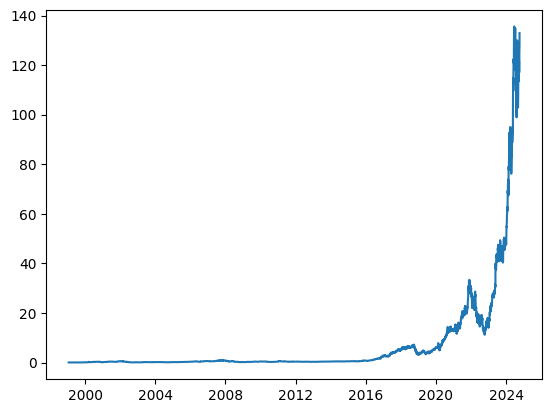

In [9]:
plt.plot(data["Close"])

In [10]:
from copy import deepcopy as dc


def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    for i in range(1, n_steps + 1):
        df[f"Close(t-{i})"] = df["Close"].shift(i)

    df.dropna(inplace=True)

    return df


lookback = 15
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10),Close(t-11),Close(t-12),Close(t-13),Close(t-14),Close(t-15)
Date,,,,,,,,,,,,,,,,
1999-02-12,0.043490,0.041146,0.037891,0.038281,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313,0.041016
1999-02-16,0.043750,0.043490,0.041146,0.037891,0.038281,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797,0.045313
1999-02-17,0.041406,0.043750,0.043490,0.041146,0.037891,0.038281,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667,0.041797
1999-02-18,0.042057,0.041406,0.043750,0.043490,0.041146,0.037891,0.038281,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536,0.041667
1999-02-19,0.043490,0.042057,0.041406,0.043750,0.043490,0.041146,0.037891,0.038281,0.039844,0.041276,0.040104,0.038021,0.037240,0.040365,0.039583,0.041536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-02,118.849998,117.000000,121.440002,121.400002,124.040001,123.510002,120.870003,116.260002,116.000000,117.870003,113.370003,115.589996,116.779999,119.099998,119.139999,116.910004
2024-10-03,122.849998,118.849998,117.000000,121.440002,121.400002,124.040001,123.510002,120.870003,116.260002,116.000000,117.870003,113.370003,115.589996,116.779999,119.099998,119.139999
2024-10-04,124.919998,122.849998,118.849998,117.000000,121.440002,121.400002,124.040001,123.510002,120.870003,116.260002,116.000000,117.870003,113.370003,115.589996,116.779999,119.099998


In [11]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[4.34900001e-02, 4.11459990e-02, 3.78910005e-02, ...,
        4.17970009e-02, 4.53130007e-02, 4.10160013e-02],
       [4.37499993e-02, 4.34900001e-02, 4.11459990e-02, ...,
        4.16669995e-02, 4.17970009e-02, 4.53130007e-02],
       [4.14059982e-02, 4.37499993e-02, 4.34900001e-02, ...,
        4.15359996e-02, 4.16669995e-02, 4.17970009e-02],
       ...,
       [1.24919998e+02, 1.22849998e+02, 1.18849998e+02, ...,
        1.15589996e+02, 1.16779999e+02, 1.19099998e+02],
       [1.27720001e+02, 1.24919998e+02, 1.22849998e+02, ...,
        1.13370003e+02, 1.15589996e+02, 1.16779999e+02],
       [1.32889999e+02, 1.27720001e+02, 1.24919998e+02, ...,
        1.17870003e+02, 1.13370003e+02, 1.15589996e+02]])

In [12]:
shifted_df_as_np.shape

(6455, 16)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99986167, -0.99989626, -0.99994428, ..., -0.99988665,
        -0.99983477, -0.99989817],
       [-0.99985783, -0.99986167, -0.99989626, ..., -0.99988857,
        -0.99988665, -0.99983477],
       [-0.99989242, -0.99985783, -0.99986167, ..., -0.9998905 ,
        -0.99988857, -0.99988665],
       ...,
       [ 0.84271004,  0.81216688,  0.75314628, ...,  0.70504445,
         0.72260312,  0.75683507],
       [ 0.88402451,  0.84271004,  0.81216688, ...,  0.67228811,
         0.70504445,  0.72260312],
       [ 0.96030861,  0.88402451,  0.84271004, ...,  0.73868629,
         0.67228811,  0.70504445]])

In [14]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((6455, 15), (6455,))

In [15]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99989817, -0.99983477, -0.99988665, ..., -0.99993853,
        -0.99994428, -0.99989626],
       [-0.99983477, -0.99988665, -0.99988857, ..., -0.99994428,
        -0.99989626, -0.99986167],
       [-0.99988665, -0.99988857, -0.9998905 , ..., -0.99989626,
        -0.99986167, -0.99985783],
       ...,
       [ 0.75683507,  0.72260312,  0.70504445, ...,  0.72584927,
         0.75314628,  0.81216688],
       [ 0.72260312,  0.70504445,  0.67228811, ...,  0.75314628,
         0.81216688,  0.84271004],
       [ 0.70504445,  0.67228811,  0.73868629, ...,  0.81216688,
         0.84271004,  0.88402451]])

In [16]:
split_index = int(len(X) * 0.90)

split_index

5809

In [17]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5809, 15), (646, 15), (5809,), (646,))

In [18]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5809, 15, 1), (646, 15, 1), (5809, 1), (646, 1))

In [19]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([5809, 15, 1]),
 torch.Size([646, 15, 1]),
 torch.Size([5809, 1]),
 torch.Size([646, 1]))

In [20]:
from torch.utils.data import Dataset


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]


train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [21]:
train_dataset

In [22]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [23]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 15, 1]) torch.Size([16, 1])


In [24]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(
            input_size, hidden_size, num_stacked_layers, batch_first=True
        )

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(
            device
        )
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(
            device
        )

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [25]:
def train_one_epoch():
    model.train(True)
    print(f"Epoch: {epoch + 1}")
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print(
                "Batch {0}, Loss: {1:.3f}".format(
                    batch_index + 1, avg_loss_across_batches
                )
            )
            running_loss = 0.0
    print()

In [26]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print("Val Loss: {0:.3f}".format(avg_loss_across_batches))
    print("***************************************************")
    print()

In [28]:
learning_rate = 0.05
num_epochs = 7
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.001
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.141
***************************************************

Epoch: 2
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.111
***************************************************

Epoch: 3
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.121
***************************************************

Epoch: 4
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.113
***************************************************

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.124
***************************************************

Epoch: 6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.105
***************************************************

Epoch: 7
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.125
*****************

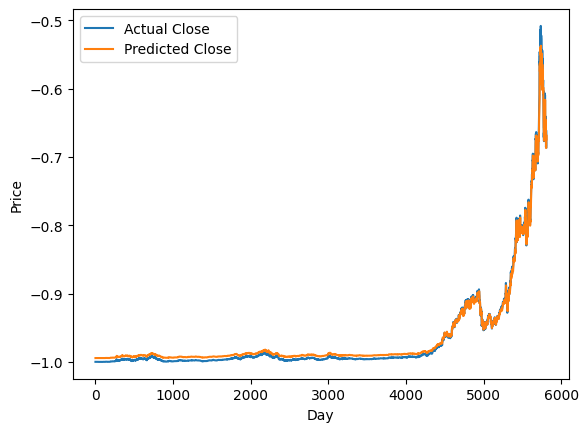

In [29]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to("cpu").numpy()

plt.plot(y_train, label="Actual Close")
plt.plot(predicted, label="Predicted Close")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()


In [30]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback + 1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 0.4166594 ,  0.41899832,  0.41985067, ..., 22.32776134,
       22.5654746 , 22.10921591])

In [31]:
dummies = np.zeros((X_train.shape[0], lookback + 1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 0.04349087,  0.04374941,  0.04140645, ..., 22.65800123,
       22.10000162, 21.33000069])

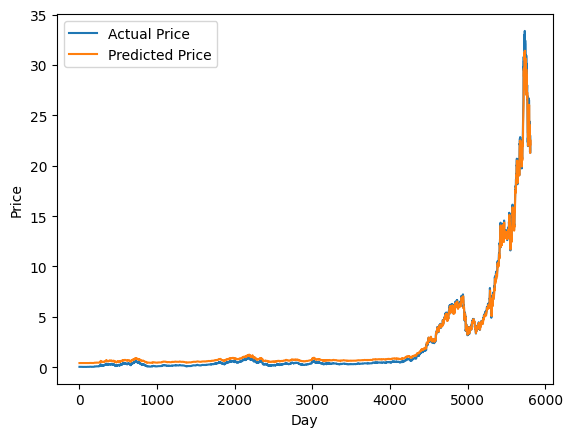

In [32]:
plt.plot(new_y_train, label="Actual Price")
plt.plot(train_predictions, label="Predicted Price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()


In [33]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback + 1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([21.38043084, 22.26303512, 23.77054661, 24.41540128, 25.58445637,
       26.17163792, 26.10722678, 25.43971814, 26.83342248, 27.17510246,
       27.4337044 , 27.79508542, 27.28431257, 26.7818249 , 26.29277287,
       26.58109402, 25.82625768, 24.46860257, 23.89949815, 23.12439119,
       22.04373832, 21.41322821, 21.77595037, 21.36486229, 21.47132952,
       21.8797636 , 21.53713431, 20.43738229, 19.56248957, 19.6187448 ,
       18.99427386, 18.42406259, 19.23019354, 18.81514667, 19.15660851,
       19.45561031, 20.01829583, 19.19925034, 18.62682538, 17.3306406 ,
       17.26407232, 16.78060704, 16.21349413, 17.11359788, 17.3033411 ,
       17.84660835, 17.22717478, 16.97866776, 16.69452759, 16.72958712,
       16.27299718, 16.62131016, 17.47863069, 18.45765172, 18.66098005,
       18.360217  , 19.09902427, 18.88092318, 18.69012564, 18.7637753 ,
       18.62791203, 18.13276832, 17.18862908, 15.91610817, 15.61685188,
       16.16803672, 15.79126892, 15.70554495, 16.23443129, 16.33

In [34]:
dummies = np.zeros((X_test.shape[0], lookback + 1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 22.97299977,  24.49599902,  24.76600066,  26.45299886,
        26.73400028,  26.52399856,  25.63400185,  28.14999908,
        27.69199932,  28.21899918,  28.65600118,  27.68999973,
        27.28600111,  26.71200072,  27.36000222,  25.93100001,
        24.40699894,  24.20800105,  23.11899835,  21.91700047,
        21.50400166,  22.20299885,  21.25799918,  21.78299944,
        22.19800188,  21.48200209,  20.18300172,  19.51500025,
        19.9020003 ,  18.78800067,  18.41500181,  19.78200047,
        18.5469992 ,  19.53300062,  19.60200073,  20.3340013 ,
        18.8440014 ,  18.6749974 ,  16.94999884,  17.59499894,
        16.6299993 ,  16.17500096,  17.70599858,  17.26399961,
        18.17700174,  16.93800128,  17.12399981,  16.6939984 ,
        16.89800134,  16.15399917,  16.97499982,  17.85099938,
        18.81100206,  18.67200003,  18.31999892,  19.59199872,
        18.71999835,  18.78600108,  18.92600088,  18.64800087,
        18.04800173,  16.97400204,  15.64699928,  15.83

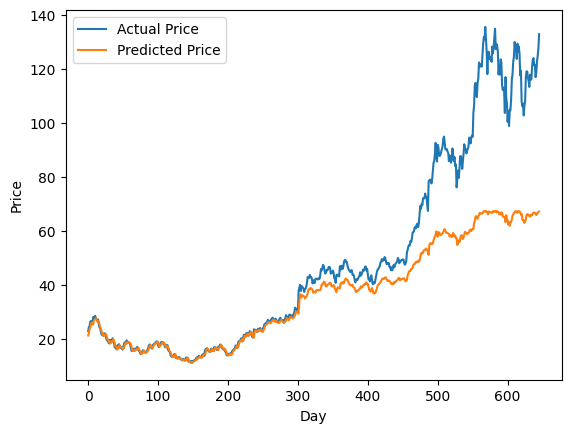

In [35]:
plt.plot(new_y_test, label="Actual Price")
plt.plot(test_predictions, label="Predicted Price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()


In [36]:
torch.save(model.state_dict(), "share_price_model.pth")